In [148]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [149]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [150]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 10
optimizer = Adam()
verbosity_mode = 1
layer_size = 10

In [151]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [152]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [153]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [154]:
m=75000
n=25000
r=0.5

In [155]:
data=np.empty(n,dtype=int)
for i in range(0,n):
    data[i]=random.randint(0, 100000000)

In [156]:
mean = sum(data)/len(data)
std = np.std(data)
print(mean)
print(std)

49843594.15136
28976856.156944625


In [157]:
new_data = []
for x in data:
    new_data+=[(x-mean)/std]

In [158]:
x = []
for i in new_data:
    x+=[[i]]
x_train = np.array(x)
y = []
for i in range(0,n):
    if(i<int(n*r)):
        y+=[[1]]
    else:
        y+=[[0]]
y_train = np.array(y)
print(x_train)
print(y_train)

[[-0.0650172 ]
 [-1.67809244]
 [-1.67185784]
 ...
 [ 0.10619951]
 [-0.19102556]
 [ 0.96902075]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [159]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
25000/25000 [==============================] - 2s 82us/sample - loss: 0.6966 - acc: 0.4946
Epoch 2/10
25000/25000 [==============================] - 2s 62us/sample - loss: 0.6937 - acc: 0.49360s - loss: 0.6937 -
Epoch 3/10
25000/25000 [==============================] - 2s 67us/sample - loss: 0.6935 - acc: 0.5004
Epoch 4/10
25000/25000 [==============================] - 2s 62us/sample - loss: 0.6935 - acc: 0.4923
Epoch 5/10
25000/25000 [==============================] - 1s 51us/sample - loss: 0.6934 - acc: 0.5019
Epoch 6/10
25000/25000 [==============================] - 1s 53us/sample - loss: 0.6934 - acc: 0.4985
Epoch 7/10
25000/25000 [==============================] - 1s 51us/sample - loss: 0.6934 - acc: 0.4964
Epoch 8/10
25000/25000 [==============================] - 2s 84us/sample - loss: 0.6934 - acc: 0.4940
Epoch 9/10
25000/25000 [==============================] - 2s 90us/sample - loss: 0.6933 - acc: 0.5057
Epoch 10/10
25000/25000 [==============================] - 1s 5

In [160]:
import matplotlib.pyplot as plt

In [161]:
model.metrics_names


['loss', 'acc']

In [162]:
acc = history.history['acc']


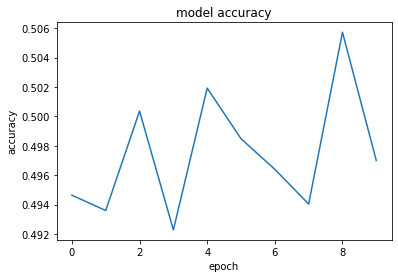

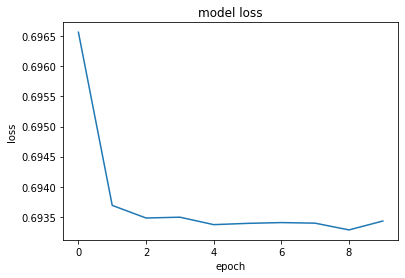

In [163]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [164]:
number_of_epochs = 10
layer_size = 50

In [165]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [166]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [167]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [168]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
25000/25000 [==============================] - 2s 74us/sample - loss: 0.6941 - acc: 0.4992
Epoch 2/10
25000/25000 [==============================] - 2s 85us/sample - loss: 0.6934 - acc: 0.5023
Epoch 3/10
25000/25000 [==============================] - 2s 84us/sample - loss: 0.6934 - acc: 0.5015
Epoch 4/10
25000/25000 [==============================] - 1s 56us/sample - loss: 0.6934 - acc: 0.5021
Epoch 5/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.6934 - acc: 0.5007
Epoch 6/10
25000/25000 [==============================] - 1s 58us/sample - loss: 0.6933 - acc: 0.5016
Epoch 7/10
25000/25000 [==============================] - 1s 56us/sample - loss: 0.6934 - acc: 0.5035
Epoch 8/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.6934 - acc: 0.5035
Epoch 9/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.6934 - acc: 0.5012
Epoch 10/10
25000/25000 [==============================] - 1s 55us/sample - loss: 

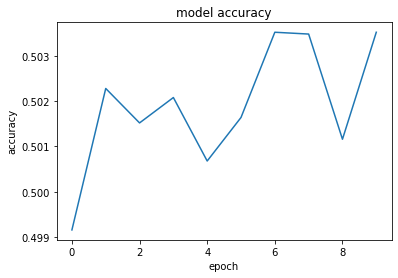

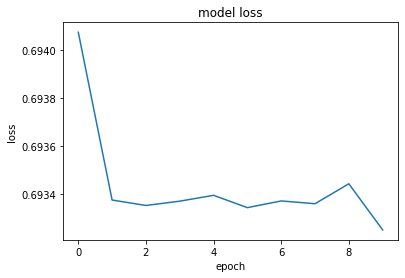

In [169]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [170]:
layer_size = 200
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25000/25000 [==============================] - 2s 60us/sample - loss: 0.6942 - acc: 0.4992
Epoch 2/10
25000/25000 [==============================] - 1s 53us/sample - loss: 0.6935 - acc: 0.5002
Epoch 3/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.6933 - acc: 0.5037
Epoch 4/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.6934 - acc: 0.4989
Epoch 5/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.6933 - acc: 0.4988
Epoch 6

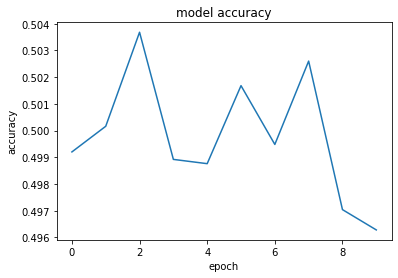

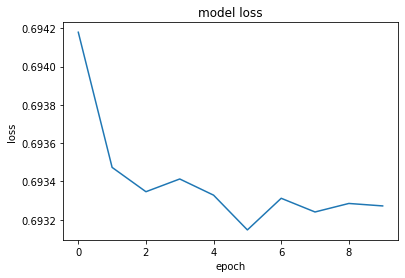

In [171]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [172]:
number_of_epochs = 30
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25000/25000 [==============================] - 3s 106us/sample - loss: 0.6941 - acc: 0.4938
Epoch 2/30
25000/25000 [==============================] - 2s 98us/sample - loss: 0.6932 - acc: 0.4982
Epoch 3/30
25000/25000 [==============================] - 2s 76us/sample - loss: 0.6932 - acc: 0.4981
Epoch 4/30
25000/25000 [==============================] - 2s 69us/sample - loss: 0.6932 - acc: 0.4992
Epoch 5/30
25000/25000 [==============================] - 2s 62us/sample - loss: 0.6932 - acc: 0.4942
Ep

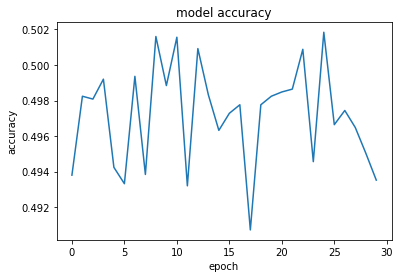

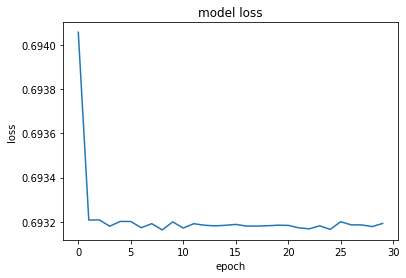

In [173]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [174]:
number_of_epochs = 30
layer_size = 10000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10000)             20000     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 10001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25000/25000 [==============================] - 4s 145us/sample - loss: 0.6938 - acc: 0.4996
Epoch 2/30
25000/25000 [==============================] - 3s 105us/sample - loss: 0.6932 - acc: 0.5002
Epoch 3/30
25000/25000 [==============================] - 3s 103us/sample - loss: 0.6932 - acc: 0.4977
Epoch 4/30
25000/25000 [==============================] - 3s 111us/sample - loss: 0.6932 - acc: 0.4960
Epoch 5/30
25000/25000 [==============================] - 3s 104us/sample - loss: 0.6932 - acc: 0.5

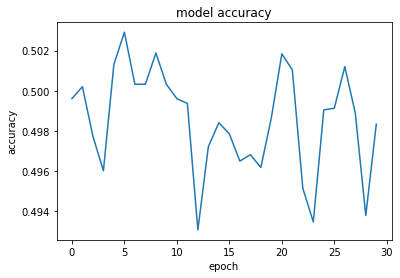

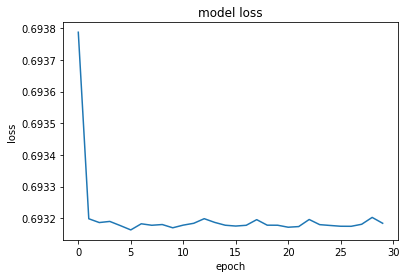

In [175]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size= 10000

In [176]:
#x=model.predict([235])[0]

In [177]:
#if x>0.5:
   # print("in")

In [178]:
bit_array = bitarray(10)
bit_array.setall(0)

# In[8]:


class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

# In[13]:


#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data


# In[ ]


#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))


In [179]:
def load_bloom(data_x,data_y,bf,n):
    for i in range(0,n):
        if((model.predict(data_x[i])[0]<0.5)and(data_y[i]==1)):
                bf.add(data_x[i])
    return            
    
            


In [180]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [181]:
load_bloom(x_train,y_train,bf,n)

In [182]:
#input in the vector form
def lookup_model(data,bf):
    pf=model.predict(data)[0]
    if(pf<0.5):
            if(bf.lookup(data)==False):
                return False
            else: return True
    else:
            return True
        


In [183]:
print(lookup_model(x_train[9],bf))
print(x_train[9])
print(model.predict(x_train[9])[0])
print(bf.lookup(x_train[9]))

True
[0.90374155]
[0.50038683]
False
